In [29]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [3]:
import json
import pandas as pd

with open(file='data/adjacency_matrix_test.json', mode='r', encoding='utf-8') as reader:
    adjacency_matrix = json.load(reader)

# converting json dataset from dictionary to dataframe
adj_mat = pd.DataFrame.from_dict(adjacency_matrix)
adj_mat = (adj_mat.T+adj_mat)/2 # force it to symmetry

adj_mat.head()

,中坡,中研,中貿,玉成,玉德,向揚,庄研,佳樂,忠陽,昆陽
中坡,0.00,5.5,4.7,2.2,0.35,2.4,5.6,3.4,2.00,1.7
中研,5.50,0.0,3.0,4.6,5.50,4.5,1.3,2.9,4.10,4.7
中貿,4.70,3.0,0.0,3.4,4.50,3.3,2.6,1.5,3.00,3.6
玉成,2.20,4.6,3.4,0.0,2.30,0.4,4.5,1.6,0.45,0.5
玉德,0.35,5.5,4.5,2.3,0.00,2.2,5.3,3.1,1.80,1.4


In [4]:
tsp = adj_mat.to_numpy()
np.shape(tsp)

(10, 10)

In [5]:
def routeLength(tsp, solution):
    pathLength = 0
    for i in range(len(solution)):
        pathLength += tsp[solution[i - 1]][solution[i]]
    return pathLength

## Update the position
change two distinct index of city

In [6]:
def SwapMove(solution, i ,j):
    # change the "index i, j" th of solution, instead of city-i and -j
    solution_test = solution.copy()
    solution_test[j] = solution[i]
    solution_test[i] = solution[j]
    return solution_test

## Main

In [7]:
# max number of step
n = 400
tabu_len = 50

# Initialize x
numofseven = np.shape(tsp)[1]
# x_start = np.arange(0, numofseven)
x_start = np.random.permutation(numofseven)
dim = len(x_start)
# initialize tabu list
# record the city-i and -j
tabu_list = []

# declare record
x_record = np.zeros((n+1, dim))
f_record = np.zeros((n+1))
fb_record = np.zeros((n+1))


# set initial value
x_record[0][:] = x_start
x_cur = x_start.copy()
x_best = x_start.copy()
f_best = routeLength(tsp, x_best)
f_record[0] = routeLength(tsp, x_start)
fb_record[0] = routeLength(tsp, x_start) # best objective value ever


for cycle in range(n):
#     print('Step: ' + str(cycle) + ' f best: ' + str(fb_record[cycle]))
    
    candidate_move = []
    candidate_length = []
    candidate_x = []
    

    # create a table of all next move
    for i in range(0, len(x_cur)): 
        for j in range(i + 1, len(x_cur)):
            # record all next x, called x_test
            x_test = SwapMove(x_cur, i ,j)
            candidate_x.append(x_test)
            # record all route length of x_test 
            candidate_length.append(routeLength(tsp, x_test))
            # record all move
            move = [x_cur[i], x_cur[j]]
            candidate_move.append(move)
    
    
    # expectation improvement aspiration: global part
    candidate_length = np.array(candidate_length)
    if np.min(candidate_length) < f_best:
        x_new = candidate_x[candidate_length.argmin()]
        move_new = candidate_move[candidate_length.argmin()]
        
        # if move in tabu list, pop it out first
        if ([move_new[0], move_new[1]] in tabu_list):
            tabu_list.pop(tabu_list.index([move_new[0], move_new[1]]))
        elif ([move_new[1], move_new[0]] in tabu_list):
            tabu_list.pop(tabu_list.index([move_new[1], move_new[0]]))
    
    
    else:
        while len(candidate_length) != 0:
            # expectation improvement aspiration: local part
            if np.min(candidate_length) < f_record[cycle]:
                x_new = candidate_x[candidate_length.argmin()]
                move_new = candidate_move[candidate_length.argmin()]
                
                # if move in tabu list, pop it out first
                if ([move_new[0], move_new[1]] in tabu_list):
                    tabu_list.pop(tabu_list.index([move_new[0], move_new[1]]))
                elif ([move_new[1], move_new[0]] in tabu_list):
                    tabu_list.pop(tabu_list.index([move_new[1], move_new[0]]))
                break
            
            # It sould not be in tabu list
            else:
                move = candidate_move[candidate_length.argmin()]
                _move = [move[1], move[0]]
                if (move not in tabu_list) and (_move not in tabu_list):
#                     f_best = candidate_length[candidate_length.argmin()]
                    x_new = candidate_x[candidate_length.argmin()]
                    move_new = candidate_move[candidate_length.argmin()]
                    break

                else:
                    candidate_x.pop(candidate_length.argmin())
                    candidate_move.pop(candidate_length.argmin())
                    # this should delete last (f**k bug)
                    candidate_length = np.delete(candidate_length, candidate_length.argmin())

    
    
    if routeLength(tsp, x_new) < f_best:
        x_best = x_new.copy()
        f_best = routeLength(tsp, x_new)
                    
    # update next step
    x_record[cycle+1][:] = x_new
    f_record[cycle+1] = routeLength(tsp, x_new)
    fb_record[cycle+1] = routeLength(tsp, x_best)
    x_cur = x_new.copy()
    
    
    # append the tabu list
    tabu_list.append(move_new)   
    if (len(tabu_list) > tabu_len):
        tabu_list.pop(0)

In [8]:
# print solution
print('Best solution: ' + str(x_best))
print('Best objective: ' + str(routeLength(tsp, x_best)))

Best solution: [0 4 9 8 1 6 2 7 3 5]
Best objective: 15.676


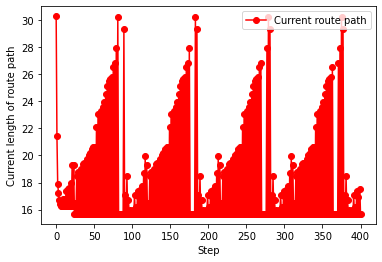

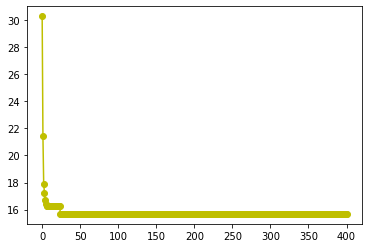

In [9]:
fig = plt.figure()
plt.plot(np.arange(0, n+1), f_record,'r-o')
plt.legend(['Current route path'])
plt.ylabel("Current length of route path")
plt.xlabel("Step")
# fig.savefig("fig/tabu-curobj.png")

fig = plt.figure()
plt.plot(np.arange(0, n+1), fb_record,'y-o')

In [10]:
listseven = list(adj_mat.columns)
numofseven = len(listseven)
startidx = np.where(x_best==0)[0][0] # this is 中坡 in x_best
pathlist = []
pathlist = listseven[0]

for i in range(1, len(x_best)):
    city_id = x_best[(startidx+i)%len(x_best)]
    pathlist = pathlist + '-->' + listseven[city_id]

pathlist = pathlist + '-->' + listseven[0]
print(pathlist)

中坡-->玉德-->昆陽-->忠陽-->中研-->庄研-->中貿-->佳樂-->玉成-->向揚-->中坡


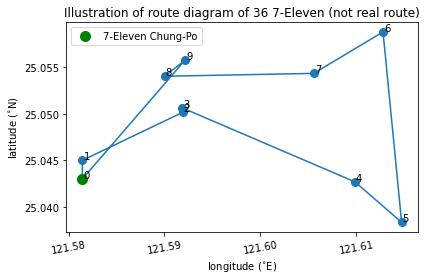

In [11]:
import json
import pandas as pd

with open(file='data/position_test.json', mode='r', encoding='utf-8') as reader:
    pos_matrix = json.load(reader)

# converting json dataset from dictionary to dataframe
pos_mat = pd.DataFrame.from_dict(pos_matrix)

listseven = list(pos_mat.columns)
x_coor = []
y_coor = []

startidx = np.where(x_best==0)[0][0] # this is city-0 (中坡) in x_best
pathlist = []
pathlist = listseven[0]
     
for i in range(0, len(x_best)):
    city_id = x_best[(startidx+i)%len(x_best)] # from city-0 go a cycle
    x_coor.append(pos_mat[listseven[city_id]][0])
    y_coor.append(pos_mat[listseven[city_id]][1])

# go back to city-0
x_coor.append(pos_mat[listseven[x_best[startidx]]][0])
y_coor.append(pos_mat[listseven[x_best[startidx]]][1])

fig = plt.figure()
plt.plot(x_coor, y_coor, 'o-', label='_nolegend_', markersize=8)
plt.plot(x_coor[x_best[startidx]], y_coor[x_best[startidx]], 'go', markersize=10)
plt.xticks([121.58, 121.59, 121.60, 121.61],rotation=10)
plt.xlabel("longitude ($^{\circ}$E)")
plt.ylabel("latitude ($^{\circ}$N)")
plt.legend(['7-Eleven Chung-Po'])
plt.title('Illustration of route diagram of 36 7-Eleven (not real route)')
for i, txt in enumerate(range(len(x_best))):
    plt.annotate(txt, (x_coor[i], y_coor[i]), xytext=(+1, +1), textcoords='offset points')
fig.tight_layout()
# fig.savefig("fig/tabu-path-2.png")

In [12]:
from numpy import save
# save('result/tabu-bestobj.npy', fb_record)